# Принятие решений в бизнесе

Для крупного интернет-магазина вместе с отделом маркетинга подготовлен список гипотез для увеличения выручки. Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.
    
Задачи:
* приоритизировать гипотезы
* проанализировать метрики: конверсию и средний чек по «сырым» данным 
* выявить аномалии и выбросы в данных, очистить данные
* проанализировать метрики: конверсию и средний чек по «очищенным» данным
* принять решение по результатам теста: 
    * Остановить тест, зафиксировать победу одной из групп или отсутствие различий между группами. 
    * Продолжить тест.


# Чтение данных

In [47]:
import pandas as pd
import datetime as dt 
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
pd.set_option("max_colwidth", 200)

## Часть 1. Приоритизация гипотез.

In [48]:
try:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
except:
    hypothesis = pd.read_csv('C:/Users/1/Desktop/Аналитик данных/Яндек курс/МОДУЛЬ 2 SQL/Принятие решений в бизнесе АВ тест/проект/hypothesis.csv')
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


В файле `hypothesis` 9 гипотез по увеличению выручки интернет-магазина
* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале.

### Фреймворк ICE

$$ICE = \frac{Impact * Confidence}{Efforts}$$

In [49]:
hypothesis['ICE'] = round((hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts'],1)
hypothesis[['Hypothesis','ICE']].sort_values(by='ICE',ascending=False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0


 Приоритизация гипотез:
 * **8**: Запустить акцию, дающую скидку на товар в день рождения
 * **0**: Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
 * **7**: Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

### Фреймворк RICE

$$RICE = \frac{Rearch * Impact * Confidence}{Efforts}$$

In [50]:
hypothesis['RICE'] = (hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']
hypothesis[['Hypothesis','RICE']].sort_values(by='RICE',ascending=False)

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Приоритизация гипотез:
* **7**: Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
* **2**: Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
* **0**: Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
* **6**: Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию

In [51]:
hypothesis = hypothesis[['Hypothesis','ICE','RICE']].sort_values(by='RICE',ascending=False)
hypothesis

,Hypothesis,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.2,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.3,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.1,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.3,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0,3.0


### Вывод
* При использовании фреймворка **ICE** лидерами стали гипотезы:
   * **Запустить акцию, дающую скидку на товар в день рождения**
   * Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
   * Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
* При использовании фреймворка **RICE** лидерами стали гипотезы:
   * **Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок**
   * Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
   * Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
   * Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию

* При использовании фреймворка RICE приоритизация гипотез изменилась. Это связано с тем, что ICE не учитывает охват пользователей в отличие от RICE. Для приоритизации гипотез предпочтительнее использовать RICE если есть такая возможность.

### Изучение данных

**Visitors**

In [52]:
try:
    visitors = pd.read_csv('/datasets/visitors.csv')
except:
    visitors = pd.read_csv('C:/Users/1/Desktop/Аналитик данных/Яндек курс/МОДУЛЬ 2 SQL/Принятие решений в бизнесе АВ тест/проект/visitors.csv')
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [53]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [54]:
print('Количество дубликатов:',visitors.duplicated().sum())

Количество дубликатов: 0


In [55]:
print('Данные о визитах с', visitors['date'].dt.date.min(),'по', visitors['date'].dt.date.max())

Данные о визитах с 2019-08-01 по 2019-08-31


**Orders**

In [56]:
try:
    orders = pd.read_csv('/datasets/orders.csv')
except: 
    orders = pd.read_csv('C:/Users/1/Desktop/Аналитик данных/Яндек курс/МОДУЛЬ 2 SQL/Принятие решений в бизнесе АВ тест/проект/orders.csv')
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [57]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [58]:
print('Количество дубликатов:',orders.duplicated().sum())

Количество дубликатов: 0


In [59]:
print('Данные о заказах с', orders['date'].dt.date.min(),'по', orders['date'].dt.date.max())

Данные о заказах с 2019-08-01 по 2019-08-31


Количество пользователей по группам

In [60]:
visitorId_count = orders.groupby('group').agg({'visitorId':'nunique'})
visitorId_count

,visitorId
group,
A,503
B,586


В группе A-503 пользователя, в группе B-586 пользователя. Проверим есть ли пользователи которые попали в обе группы. 

In [61]:
countGroups = orders.groupby('visitorId')['group'].nunique()
countGroups

visitorId
5114589       1
6958315       1
8300375       2
11685486      1
39475350      1
             ..
4266935830    2
4278982564    1
4279090005    1
4281247801    1
4283872382    1
Name: group, Length: 1031, dtype: int64

In [62]:
orders = orders.merge(countGroups, on=['visitorId', 'visitorId'])
orders.head()

,transactionId,visitorId,date,revenue,group_x,group_y
0,3667963787,3312258926,2019-08-15,1650,B,1
1,2804400009,3642806036,2019-08-15,730,B,1
2,2961555356,4069496402,2019-08-15,400,A,2
3,1473132782,4069496402,2019-08-12,640,B,2
4,3797467345,1196621759,2019-08-15,9759,B,1


In [63]:
visitorId_duplicated = orders[orders['group_y'] == 2].groupby('group_x', as_index=False)['visitorId'].nunique()
visitorId_duplicated.columns = ['group','duplicated']
visitorId_count = visitorId_count.merge(visitorId_duplicated, on=['group'])
visitorId_count['share'] = round(visitorId_count['duplicated']/visitorId_count['visitorId']*100,2)
visitorId_count

,group,visitorId,duplicated,share
0,A,503,58,11.53
1,B,586,58,9.90


    58 пользователей попали в обе группы, при удалении этих пользователей из обеих групп мы потеряем для группы А 11.5% событий, для группы В - 9.9% событий.

Удалим дубликаты пользователей в обеих группах.

In [64]:
orders = orders[orders['group_y'] == 1]
orders = orders.rename(columns={'group_x':'group'})
orders.head()

,transactionId,visitorId,date,revenue,group,group_y
0,3667963787,3312258926,2019-08-15,1650,B,1
1,2804400009,3642806036,2019-08-15,730,B,1
4,3797467345,1196621759,2019-08-15,9759,B,1
5,2282983706,2322279887,2019-08-15,2308,B,1
6,182168103,935554773,2019-08-15,2210,B,1


Проверим сколько уникальных пользователей осталось в обеих группах.

In [65]:
ordrers_group = orders.groupby('group').agg({'visitorId':'nunique'})
ordrers_group

,visitorId
group,
A,445
B,528


После удаления пользователей которые попали в обе группы мы потеряли 58 пользователей.В группе A-445 уникальных пользователей, в группе B-528 уникальных пользователей. Разница между покупателями легко объясняется воздействием на группу В - возможно, причина просто в лучшей конверсии. Если бы это разница была значительной - например, многократной - это было бы признаком проблем. Но в данном проекте разница между покупателями не сигнализирует об ошибках в сборе данных.

### График кумулятивной выручки по группам. 

In [66]:
datesGroups = orders[['date','group']].drop_duplicates() # создаем массив уникальных пар значений дат и групп теста

In [67]:
# получаем агрегированные кумулятивные по дням данные о заказах
ordersAggregated = (datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], 
                                    orders['group'] == x['group'])]
    .agg({'date' : 'max', 
          'group' : 'max', 
          'transactionId' : 'nunique', 
          'visitorId' : 'nunique',
          'revenue' : 'sum'}), axis=1)
                    .sort_values(by=['date','group'])
                   )

In [68]:
# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = (datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], 
                                    visitors['group'] == x['group'])]
    .agg({'date' : 'max', 
          'group' : 'max', 
          'visitors' : 'sum'}), axis=1)
                     .sort_values(by=['date','group'])
                     )

In [69]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(
    visitorsAggregated,
    left_on=['date', 'group'],
    right_on=['date', 'group']
)
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


In [70]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

In [71]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

In [72]:
def plot (x1, y1, x2, y2, title):
    plt.figure(figsize=(12,5))
    plt.plot(x1, y1, label='A')
    plt.plot(x2, y2, label='B')
    plt.title(title)
    plt.legend()
    plt.xticks(rotation=45)

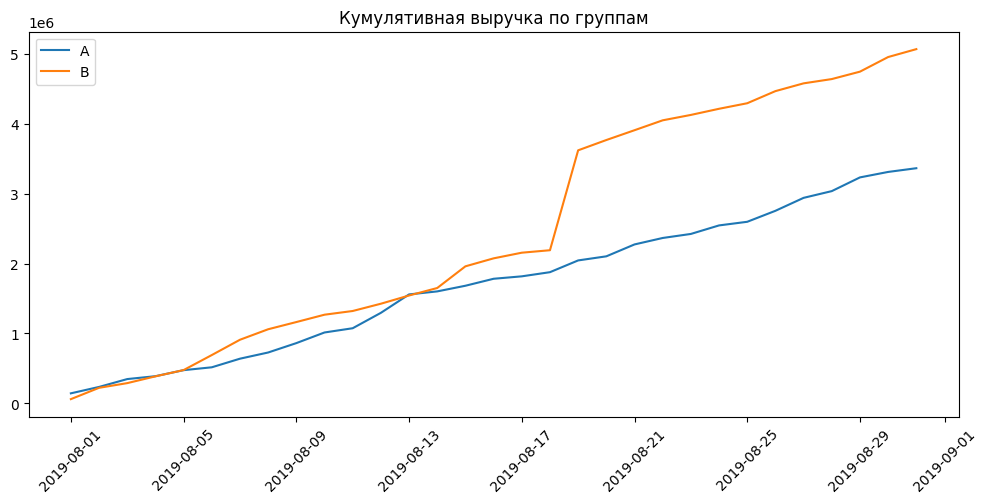

In [73]:
plot(cumulativeRevenueA['date'],
       cumulativeRevenueA['revenue'],
       cumulativeRevenueB['date'],
       cumulativeRevenueB['revenue'],
       title='Кумулятивная выручка по группам')

**Вывод**:
* Выручка для группы А в течении всего периода увеличивается равномерно
* Выручка для группы В в течении всего периода увеличивается. Есть всплеск суммы выручки 19 августа, это говорит о том в выборке присутсятвуют либо очень дорогие заказы, либо всплеск количества заказов.



### График кумулятивного среднего чека по группам. 

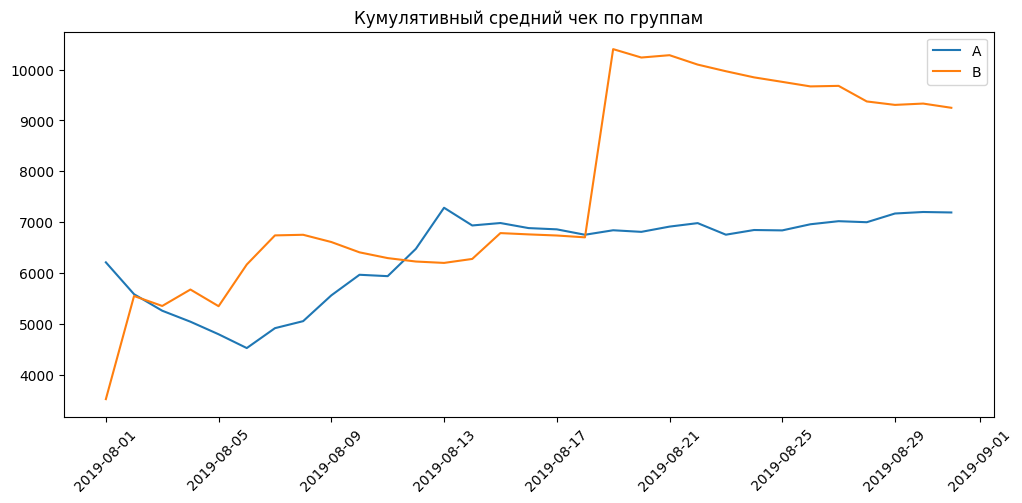

In [74]:
plot(cumulativeRevenueA['date'],
     cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'],
     cumulativeRevenueB['date'],
     cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'],
     title='Кумулятивный средний чек по группам'
)

**Вывод**:
- На графиках заметны колебания средних чеков обеих групп. Средний чек группы A стабилизируется после 14 августа.
- Средний чек группы В резко возрастает 19 августа. Это может сигнализировать о появлении очень дорогих заказов.

### График относительного изменения кумулятивного среднего чека группы B к группе A. 

(array([18109., 18113., 18117., 18121., 18125., 18129., 18133., 18137.,
        18140.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

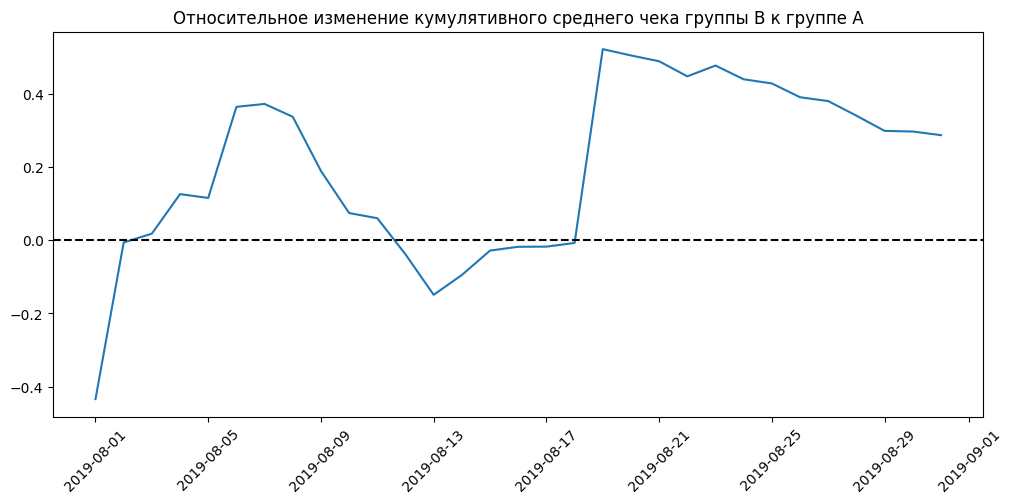

In [75]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, 
                                                   left_on='date',
                                                   right_on='date',
                                                   how='left', 
                                                   suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(12,5))
plt.plot(mergedCumulativeRevenue['date'], 
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.xticks(rotation=45)

**Вывод**: На графике мы видим колебания отношения средних чеков и резкий скачок 19 августа, что еще раз свидетельствует об аномальных значениях.

### График кумулятивной конверсии по группам. 

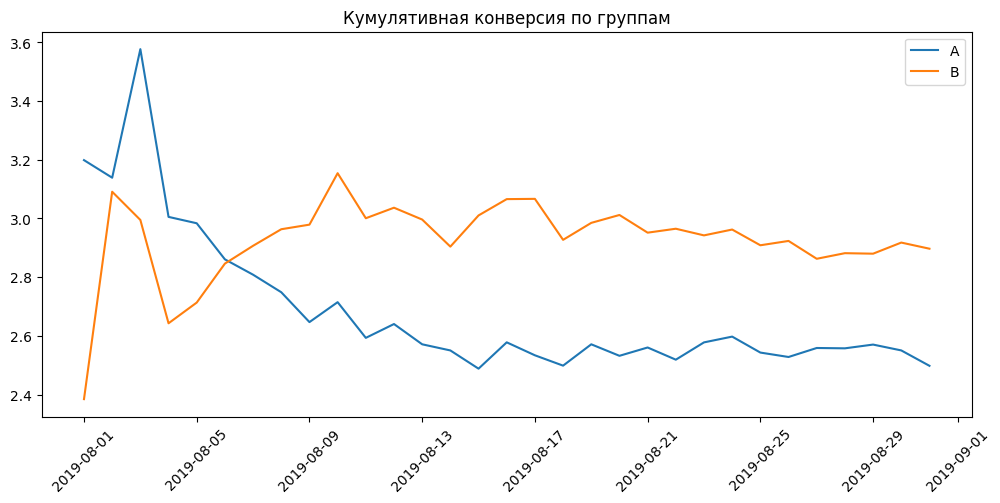

In [76]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors'] * 100

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plot(cumulativeDataA['date'],
     cumulativeDataA['conversion'],
     cumulativeDataB['date'],
     cumulativeDataB['conversion'],
     title='Кумулятивная конверсия по группам'
)

**Вывод**: В самом начале теста группа A имела большую конверсию в сравнении с группой B, с 6 августа конверсия группы B выравнивается, и до конца теста конверсия группы B остается выше конверсии группы А.

### График относительного изменения кумулятивной конверсии группы B к группе A. 

(18109.0, 18139.0, -0.3, 0.3)

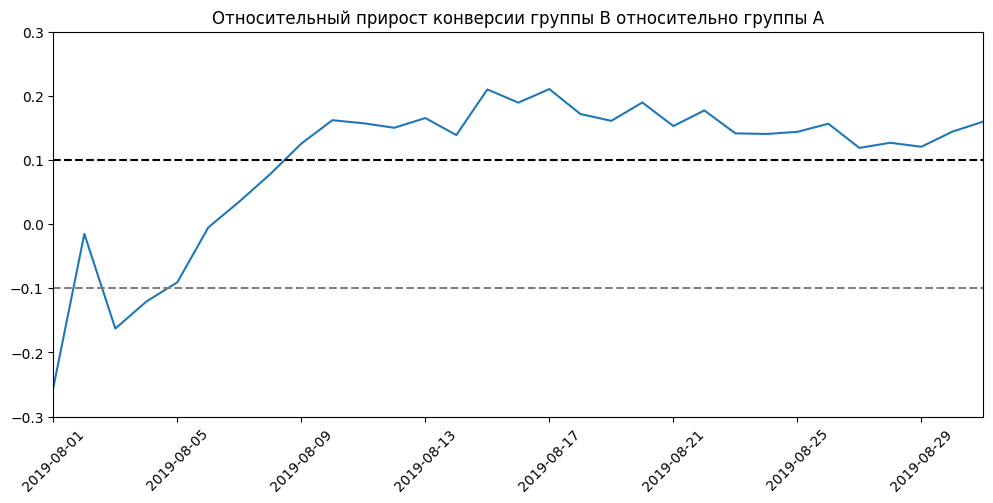

In [77]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], 
                                                                           left_on='date', 
                                                                           right_on='date', 
                                                                           how='left', 
                                                                           suffixes=['A', 'B'])
plt.figure(figsize=(12,5))
plt.plot(mergedCumulativeConversions['date'],
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1,
)
plt.title('Относительный прирост конверсии группы B относительно группы A')
plt.xticks(rotation=45)

plt.axhline(y=0.1, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axis([mergedCumulativeConversions['date'].dt.date.min(),
          mergedCumulativeConversions['date'].dt.date.max(), -0.3, 0.3])

**Вывод**: Группа B лидирует в конверсии после 6 августа, и фиксируется около прироста примерно в 20%.

### Точечный график количества заказов по пользователям. 

In [78]:
ordersByUsers = (orders.groupby('visitorId',as_index=False)
                .agg({'transactionId':'nunique'}))
ordersByUsers.columns=['visitorId','orders']
ordersByUsers.sort_values(by='orders',ascending=False).head()

,visitorId,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3


Text(0.5, 0, 'Количество наблюдений')

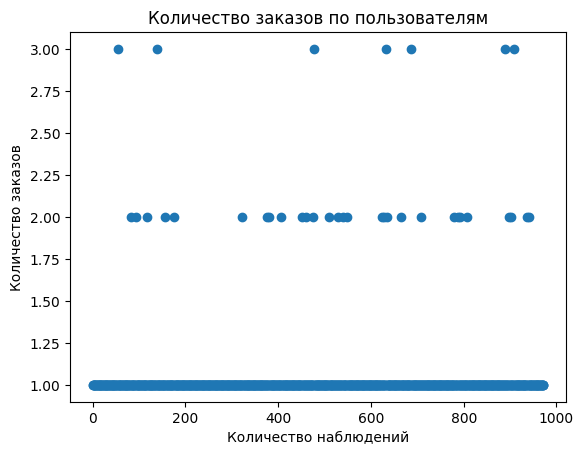

In [79]:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values,ordersByUsers['orders'])
plt.title('Количество заказов по пользователям')
plt.ylabel('Количество заказов')
plt.xlabel('Количество наблюдений')

Большинство покупателей заказывали только один раз. Однако есть пользователи с 2 и 3 заказами. Чтобы определить нижнюю границу числа заказов, и отсеять аномальных пользователей посчитаем 95-й и 99-й перцентили количества заказов на пользователя.

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [80]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[1. 2.]


### Точечный график стоимостей заказов. 

**Вывод:**
* Не более 5% пользователей оформляли больше чем 1 заказа. 
* 1% пользователей заказывали более 2 раз.
* Разумно выбрать 2 заказа на одного пользователя за нижнюю границу числа заказов, и отсеять аномальных пользователей по ней.

Text(0.5, 0, 'Количество наблюдений')

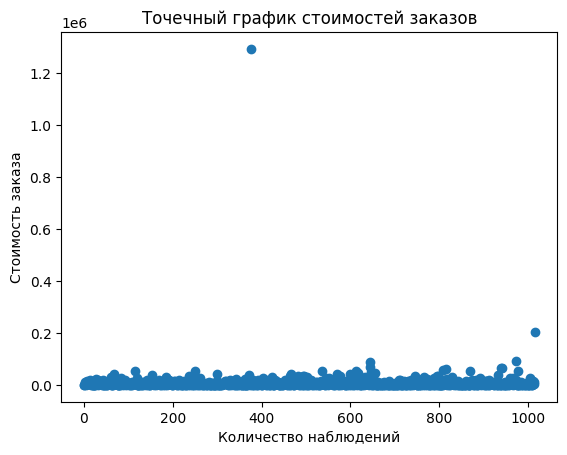

In [81]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values,orders['revenue'])
plt.title('Точечный график стоимостей заказов')
plt.ylabel('Стоимость заказа')
plt.xlabel('Количество наблюдений')

**Вывод:**
На графике виден один сильно выбивающийся аномально дорогой заказ более 1,2 млн.руб. и заказ в 200т.руб. Основная доля заказов менее 100т.руб. Чтобы определить нижнюю границу стоимости заказов, и отсеять аномальные заказы посчитаем 95-й и 99-й перцентили стоимости заказов.

Рассмотрим как распределяется стоимость основной части заказов.

(0.0, 120000.0)

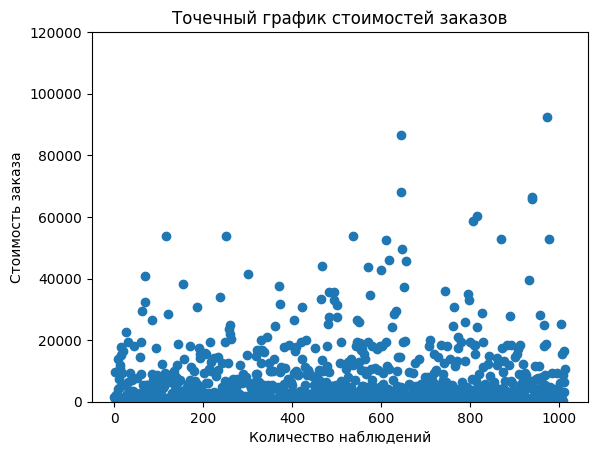

In [82]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values,orders['revenue'])
plt.title('Точечный график стоимостей заказов')
plt.ylabel('Стоимость заказа')
plt.xlabel('Количество наблюдений')
plt.ylim(0, 120000)

График показывает что больщая часть заказов менее 20тыс.руб. Посчитаем 95-й и 99-й перцентили стоимости заказов и выберем границу для определения аномальных заказов.

### Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.

In [83]:
print(np.percentile(orders['revenue'], [95,99]))

[26785. 53904.]


**Вывод:**
* Не более 5% заказов дороже 26 785 рублей
* Не более 1% заказов дороже 53 904 рублей.
* Разумно выбрать 26 785 за нижнюю границу стоимости заказов, и отсеять аномальные заказы по ней.

### Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным. 

In [84]:
# Подготовим данные
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
)

print(data.head(5)) 

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              23           142779              17   
1 2019-08-02              19            91602              23   
2 2019-08-03              24           112473              14   
3 2019-08-04              11            41176              14   
4 2019-08-05              22            86383              21   

   revenuePerDateB  visitorsPerDateA  visitorsPerDateB  
0            59758               719               713  
1           162043               619               581  
2            67049               507               509  
3            96890               717               770  
4            89908               756               707  


**Нулевая гипотеза:** различий в конверсии между группами нет. **Альтернативная:** различия в конверсии между группами есть.
**Уровень значимости:** $\alpha = 0.05$

In [85]:
sampleA = data['ordersPerDateA'] / data['visitorsPerDateA']
sampleB = data['ordersPerDateB'] / data['visitorsPerDateB']
print('p-value:',"{0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))
print('Относительный прирост конверсии группы В к конверсии группы А в процентах:',
      "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value: 0.054
Относительный прирост конверсии группы В к конверсии группы А в процентах: 0.175


На доступных «сырых» данных на 5% уровне значимости нет оснований отвергнуть нулевую гипотезу в пользу альтернативной (p-value: 0.054 равно уровню значимости 𝛼=0.05). Есть существенное различие в конверсиях пользователей групп A и B. Относительный прирост конверсии группы В к конверсии группы А равен 17,5%.

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным. 

**Нулевая гипотеза:** различий в среднем чеке между группами нет. **Альтернативная гипотеза:** различия в среднем чеке между группами есть.

In [86]:
print('p-value:','{0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                                       orders[orders['group']=='B']['revenue'])[1]))
print('Относительный прирост среднего чека группы В к среднему чеку группы А в процентах:',
      '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/
                       orders[orders['group']=='A']['revenue'].mean()-1)) 

p-value: 0.829
Относительный прирост среднего чека группы В к среднему чеку группы А в процентах: 0.287


На доступных «сырых» данных на 5% уровне значимости нет оснований отвергать нулевую гипотезу
(p-value = 0.83 больше уровня значимости 𝛼=0.05). Не обнаружено статистически значимых различий между группами. Однако группа B выигрывает на 28.7%. На данное значение могли повлиять выбросы, которые мы наблюдали на графиках ранее.

### Статистическая значимость различий в конверсии между группами по «очищенным» данным. 

In [87]:
abnormalUsers = (
    pd.concat([ordersByUsers[ordersByUsers['orders'] > np.percentile(ordersByUsers['orders'], 99)]['visitorId'],
              orders[orders['revenue'] > np.percentile(orders['revenue'], 95)]['visitorId']], axis=0)
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0]) 

55      249864742
138     611059232
478    2108163459
632    2742574263
687    2988190573
Name: visitorId, dtype: int64
58


In [88]:
ordersADaily = (
    orders[np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)))][['date', 
                                                                             'transactionId', 
                                                                             'visitorId', 
                                                                             'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersBDaily = (
    orders[np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)))][['date', 
                                                                             'transactionId', 
                                                                             'visitorId', 
                                                                             'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']  

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
)
            
data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,visitorsPerDateA,visitorsPerDateB
0,2019-08-01,16,54351,17,59758,719,713
1,2019-08-02,18,89912,21,93234,619,581
2,2019-08-03,24,112473,14,67049,507,509
3,2019-08-04,11,41176,13,65540,717,770
4,2019-08-05,22,86383,20,61558,756,707


**Нулевая гипотеза:** различий в конверсии между группами нет. **Альтернативная:** различия в конверсии между группами есть.

In [89]:
print('p-value:',"{0:.3f}".format(st.mannwhitneyu(data['ordersPerDateA'] / data['visitorsPerDateA'],
                                                  data['ordersPerDateB'] / data['visitorsPerDateB'])[1]))
print('Относительный прирост конверсии группы В к конверсии группы А в процентах:',
      "{0:.3f}".format((data['ordersPerDateB'] / data['visitorsPerDateB']).mean() 
                       / (data['ordersPerDateA'] / data['visitorsPerDateA']).mean() - 1))

p-value: 0.040
Относительный прирост конверсии группы В к конверсии группы А в процентах: 0.194


На доступных «очищенных» данных на 5% уровне значимости имеются основания отвергнуть нулевую гипотезу в пользу альтернативной (p-value: 0.04 меньше уровня значимости 𝛼=0.05). Значение равно значению, полученному на "сырых" данных. Относительный прирост конверсии группы В к конверсии группы А равен 19,4%. Конверсия не зависела от аномалий и выбросов.

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным. 

In [90]:
print('p-value:',
    '{0:.3f}'.format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Относительный прирост среднего чека группы В к среднему чеку группы А в процентах:',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

p-value: 0.646
Относительный прирост среднего чека группы В к среднему чеку группы А в процентах: -0.048


На доступных «очищенных» данных на 5% уровне значимости нет оснований отвергать нулевую гипотезу (p-value = 0.65 больше уровня значимости 𝛼=0.05). Не обнаружено статистически значимых различий между группами. Относительный прирост среднего чека группы B к среднему чеку группы А меньше 0. Различие со значением относительного прироста среднего чека группы В на "сырых" данных связано с наличием аномалий / выбросов.

## Решение по результатам теста. 

* По «сырым» и «очищенным» данным есть статистически значимые различия по конверсии между группами, относительный прирост конверсии группы В к конверсии группы А равен 19,4%. Конверсия не зависела от аномалий и выбросов. График различия конверсии между группами сообщает, что результаты группы B лучше группы A. Наблюдается тенденция к росту.
* По «сырым» и «очищенным» данным нет статистически значимых различий в среднем чеке между группами. По «сырым» данным группа В выигрывала на 28.7%, после очистки от выбросов средний чек группы B не отличается от среднего чека группы A. График кумулятивного среднего чека по группам указал на аномальные значения. 
* Решение: Остановить тест, **зафиксировать победу группы В**. Средний чек не изменился, но возросла конверсия, следовательно, увеличилось количество покупателей.